<a href="https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Parciales/Segundo%20Parcial/Aprendizaje%20no%20supervisado/D2(171).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Final

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

#### Importamos las librerisa necesarias

In [58]:
from sklearn.datasets import make_blobs #Para generar conjuntos de datos simulados con una distribución específica
import numpy as np #para el manejo de matrices y vectores

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

import pandas as pd
# #esta tabulate nos sirve para hacer tablas
# from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
%matplotlib inline

## K-Means para aprendizaje no supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados.

In [59]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    # sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

### Carga del dataset

In [60]:
def graficar_imagenes(data, num_images=5):
    # Asegúrate de que no estamos intentando graficar más imágenes de las que existen en el dataset
    num_images = min(num_images, len(data))

    # Define el tamaño de la figura
    plt.figure(figsize=(10, 2 * num_images))

    for i in range(num_images):
        # Extrae la imagen y la redimensiona
        image = data.iloc[i].values
        image = image.reshape(32, 32, 3)
        image = image.astype(np.uint8)

        # Crea un subplot para cada imagen
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')

    plt.show()

## cargamos el dataset

In [61]:
# dataset = pd.read_csv('/content/gdrive/MyDrive/Datasets/MiningProcess_Flotation_Plant_Database.csv', delimiter=',')
dataset = pd.read_csv('dataset_2.csv', delimiter=',')

dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,29,68,172,29,68,172,29,68,172,29,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,228,208,249,228,208,249,228,208,249,228,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [62]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: int64(3072)
memory usage: 1.1 GB


In [63]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,196.24760,196.590440,196.564620,196.032260,196.416040,196.509640,199.094440,199.478480,199.547420,202.454360,...,253.99182,254.219500,254.167220,254.163880,254.362180,254.334540,254.316520,254.510900,254.501260,254.476620
std,81.17245,80.806475,80.930436,81.282619,80.884838,80.938005,80.201079,79.859451,79.834562,78.813689,...,13.07097,11.272069,11.842475,11.850291,10.242708,10.574455,10.731307,8.978582,9.095393,9.425976
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.00000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000
25%,139.00000,140.000000,139.000000,138.000000,139.000000,139.000000,146.000000,147.000000,147.000000,155.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
50%,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
75%,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
max,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


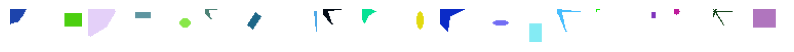

In [67]:
graficar_imagenes(dataset, num_images=20)

Verficamos que no exista valores nulos:

In [36]:
dataset.isna().any()

0       False
1       False
2       False
3       False
4       False
        ...  
3067    False
3068    False
3069    False
3070    False
3071    False
Length: 3072, dtype: bool

Se observa que todos los datos son de enteros, por lo tanto no se realiza ningun tipo de procesamiento de datos.

#### Normalizacion de las caracteristicas

In [37]:
print("la cantidad total de datos: ", dataset.shape[0])

la cantidad total de datos:  50000


Como podemos observar en siguiente cuadro, se ve que el valor minimo y maximo en todos es demasiado diferente, para eso normalizaremos los datos, esto para que esten a una misma escala y el modelo pueda converger mejor:

In [38]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,196.24760,196.590440,196.564620,196.032260,196.416040,196.509640,199.094440,199.478480,199.547420,202.454360,...,253.99182,254.219500,254.167220,254.163880,254.362180,254.334540,254.316520,254.510900,254.501260,254.476620
std,81.17245,80.806475,80.930436,81.282619,80.884838,80.938005,80.201079,79.859451,79.834562,78.813689,...,13.07097,11.272069,11.842475,11.850291,10.242708,10.574455,10.731307,8.978582,9.095393,9.425976
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.00000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000
25%,139.00000,140.000000,139.000000,138.000000,139.000000,139.000000,146.000000,147.000000,147.000000,155.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
50%,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
75%,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
max,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [39]:
dataset_norm, mu, sigma = featureNormalize(dataset)
dataset_norm.describe()

# dataset_norm = (dataset- dataset.min()) / (dataset.max() - dataset.min())
# dataset_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-1.060130e-16,1.872280e-17,5.279333e-17,-7.005951e-17,-1.016964e-16,1.267608e-16,6.068035e-17,1.041300e-16,1.639933e-16,-1.120526e-16,...,7.837997e-16,-9.455903e-16,1.135163e-15,-5.016432e-16,5.063328e-16,-3.814549e-16,2.519229e-16,8.577672e-16,-2.377476e-16,3.274891e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.417687e+00,-2.432879e+00,-2.428834e+00,-2.411761e+00,-2.428366e+00,-2.427927e+00,-2.482466e+00,-2.497894e+00,-2.499537e+00,-2.568797e+00,...,-1.927893e+01,-2.246456e+01,-2.137811e+01,-2.127934e+01,-2.483374e+01,-2.395746e+01,-2.351242e+01,-2.834673e+01,-2.787167e+01,-2.678546e+01
25%,-7.052660e-01,-7.003276e-01,-7.112923e-01,-7.139637e-01,-7.098563e-01,-7.105465e-01,-6.620232e-01,-6.571421e-01,-6.582105e-01,-6.021141e-01,...,7.713200e-02,6.924264e-02,7.032215e-02,7.055762e-02,6.227127e-02,6.293153e-02,6.369092e-02,5.447463e-02,5.483490e-02,5.552584e-02
50%,7.238045e-01,7.228399e-01,7.220518e-01,7.254728e-01,7.242958e-01,7.226635e-01,6.970744e-01,6.952474e-01,6.946006e-01,6.667137e-01,...,7.713200e-02,6.924264e-02,7.032215e-02,7.055762e-02,6.227127e-02,6.293153e-02,6.369092e-02,5.447463e-02,5.483490e-02,5.552584e-02
75%,7.238045e-01,7.228399e-01,7.220518e-01,7.254728e-01,7.242958e-01,7.226635e-01,6.970744e-01,6.952474e-01,6.946006e-01,6.667137e-01,...,7.713200e-02,6.924264e-02,7.032215e-02,7.055762e-02,6.227127e-02,6.293153e-02,6.369092e-02,5.447463e-02,5.483490e-02,5.552584e-02
max,7.238045e-01,7.228399e-01,7.220518e-01,7.254728e-01,7.242958e-01,7.226635e-01,6.970744e-01,6.952474e-01,6.946006e-01,6.667137e-01,...,7.713200e-02,6.924264e-02,7.032215e-02,7.055762e-02,6.227127e-02,6.293153e-02,6.369092e-02,5.447463e-02,5.483490e-02,5.552584e-02


Verificamos que no haya duplicados:

In [40]:
# Verificar duplicados
duplicados = dataset_norm.duplicated().sum()
print(f'Número de duplicados: {duplicados}')

# Eliminar duplicados
dataset_norm_dedup = dataset_norm.drop_duplicates()

Número de duplicados: 1


In [41]:
dataset_norm_dedup

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,-2.060419,-1.591354,-0.303531,-2.054977,-1.587656,-0.302823,-2.120871,-1.646390,-0.345060,-2.200837,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
1,0.723805,0.722840,0.722052,0.725473,0.724296,0.722664,0.697074,0.695247,0.694601,0.666714,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
2,0.391176,0.141198,0.647913,0.393295,0.143217,0.648532,0.360417,0.106708,0.619444,0.324130,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
3,0.723805,0.722840,0.722052,0.725473,0.724296,0.722664,0.697074,0.695247,0.694601,0.666714,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
4,0.723805,0.722840,0.722052,0.725473,0.724296,0.722664,0.697074,0.695247,0.694601,0.666714,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-1.542997,0.104071,-2.144636,-1.538256,0.106127,-2.143757,-1.597182,0.069141,-2.211438,-1.667929,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
49996,0.723805,0.722840,0.722052,0.725473,0.724296,0.722664,0.697074,0.695247,0.694601,0.666714,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
49997,0.723805,0.722840,0.722052,0.725473,0.724296,0.722664,0.697074,0.695247,0.694601,0.666714,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526
49998,-1.530677,-2.272000,-1.712162,-1.525954,-2.267642,-1.711322,-1.584713,-2.335107,-1.773027,-1.655241,...,0.077132,0.069243,0.070322,0.070558,0.062271,0.062932,0.063691,0.054475,0.054835,0.055526


#### Calculo del numero de clusters

Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos.

en ``kmeans.fit_transform(X_train)`` transformamos X_train en una matriz de distancias a los centroides de los clústeres. X_digits_dist contendrá una matriz donde cada fila representará una instancia de X_train y cada columna representará la distancia de esa instancia a cada uno de los 50 centroides de los clústeres.

* la fila es la instancia de X_train.
* la columna es la distancia de esa instancia a cada centroide de los 50 clusteres.

#### Aplicacion del metodo de la silueta:

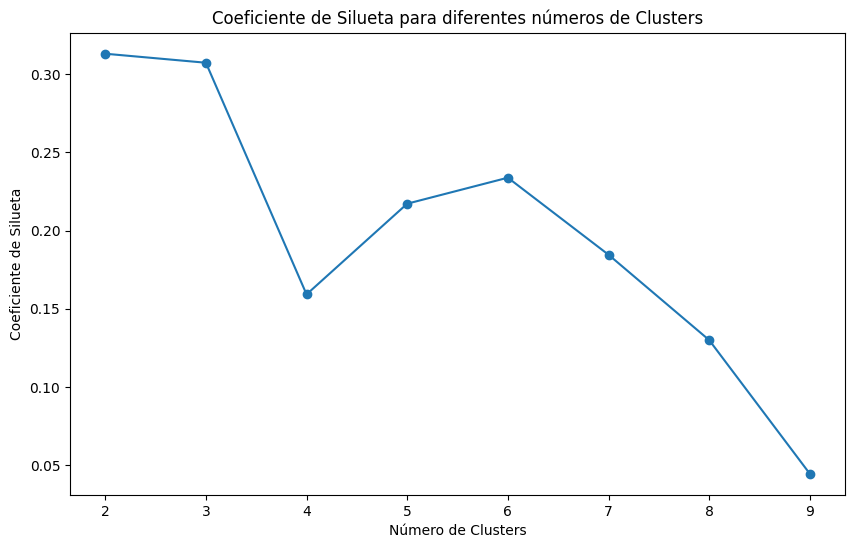

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(dataset_norm[:2000])
    score = silhouette_score(dataset_norm[:2000], labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()

In [43]:
silhouette_scores

[0.31315650015710994,
 0.3073904003346504,
 0.15924019407932052,
 0.21724127170543028,
 0.23387621297901343,
 0.18461313259884107,
 0.1300284508419465,
 0.044545121116212616]

In [44]:
max_score_idx = np.argmax(silhouette_scores) + 2
max_score = max(silhouette_scores)
print("El mejor valor de K es:", max_score_idx, "con coeficiente de silueta de:", max_score)

El mejor valor de K es: 2 con coeficiente de silueta de: 0.31315650015710994


#### podemos observar que segun la grafica el numero ideal de klusters es 2

#se hizo la prueba con 6 klusters

In [45]:
import numpy as np
from sklearn.cluster import KMeans

#nuestro k es 13
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(dataset_norm)

KMeans(n_clusters=6, random_state=42)

In [46]:
for i in range(k):
    print("La cantidad de elementos en el grupo ",i," es de: ",len(kmeans.labels_[ kmeans.labels_ == i ]) )

La cantidad de elementos en el grupo  0  es de:  2462
La cantidad de elementos en el grupo  1  es de:  29513
La cantidad de elementos en el grupo  2  es de:  8098
La cantidad de elementos en el grupo  3  es de:  1684
La cantidad de elementos en el grupo  4  es de:  4583
La cantidad de elementos en el grupo  5  es de:  3660


In [47]:

dataset['Cluster'] = kmeans.labels_
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Cluster
0,29,68,172,29,68,172,29,68,172,29,...,255,255,255,255,255,255,255,255,255,2
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,4
2,228,208,249,228,208,249,228,208,249,228,...,255,255,255,255,255,255,255,255,255,1
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1


#### Observar los clusters que se formaron

Lo que haremos aqui es que aplicaremos PCA el cual hara una reduccion de dimensiones a solo 2 para poder observar como se separaron nuestros clusters.


In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dataset_norm)

# Creamos un DataFrame con los dos valores de los componentes principales
pca_dataset_df = pd.DataFrame(data=pca_dataset, columns=['Componente_1', 'Componente_2'])
pca_nombres_df = pd.concat([pca_dataset_df, dataset['Cluster']], axis=1)

pca_nombres_df

,Componente_1,Componente_2,Cluster
0,3.051274,-25.539183,2
1,15.985096,31.957474,4
2,-5.016766,-5.025075,1
3,-6.038050,-4.335799,1
4,-11.922732,7.509909,1
...,...,...,...
49995,-16.634316,-6.138306,1
49996,-18.138990,0.027008,1
49997,-16.275279,8.633527,1
49998,-18.107861,-3.768247,1


Graficando:

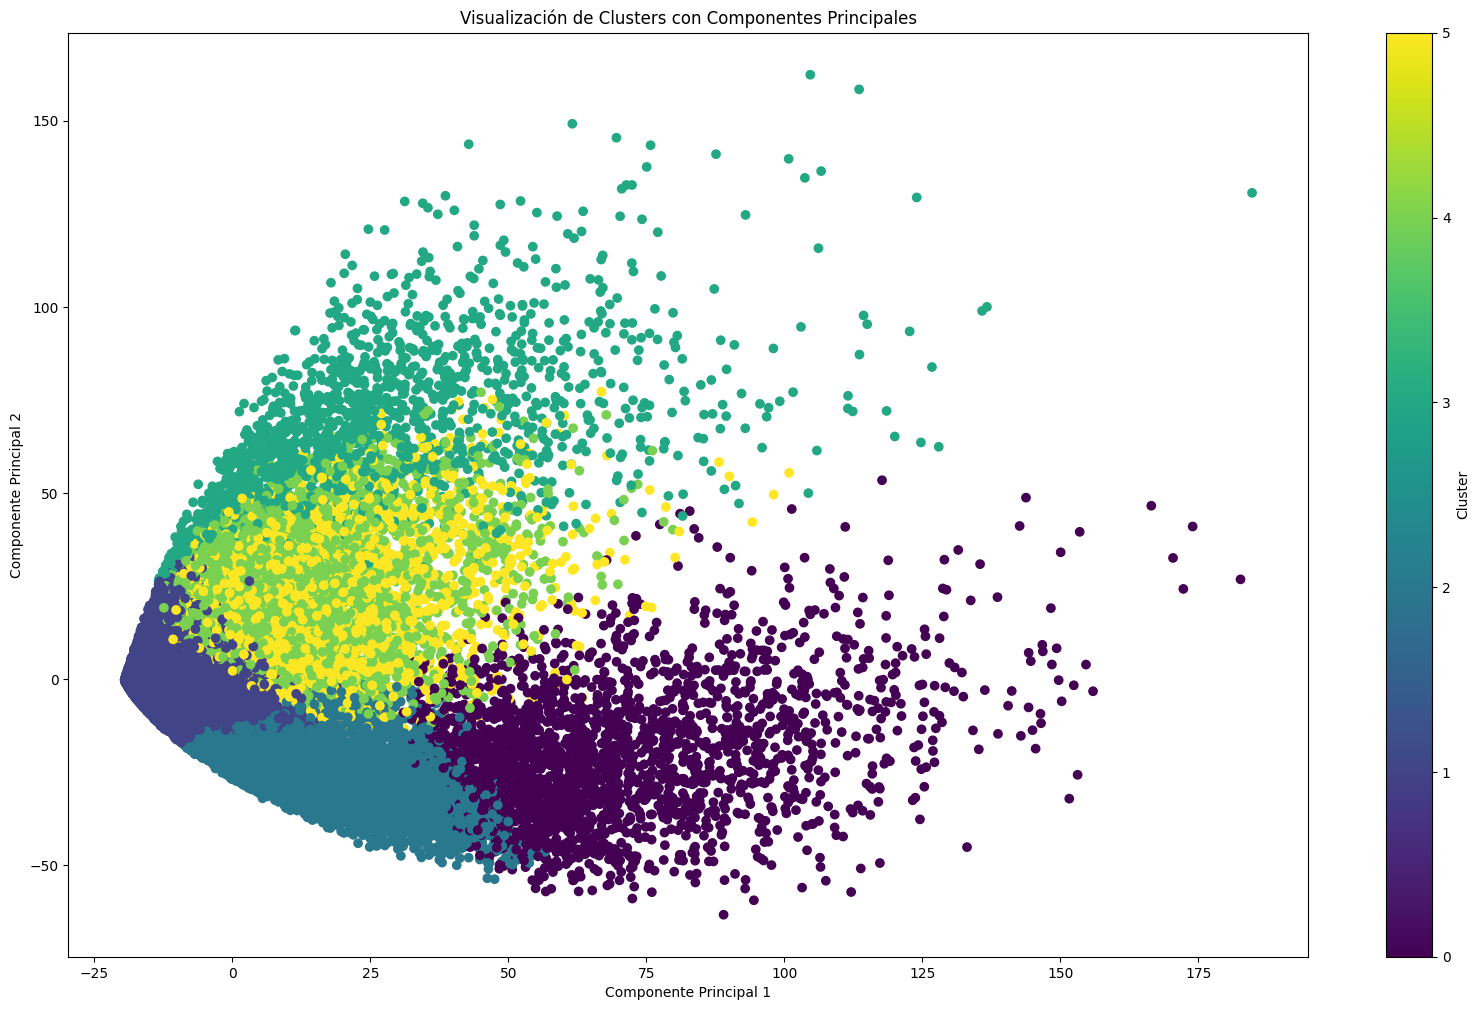

In [49]:
plt.figure(figsize=(20, 12))  # Ajusta el tamaño de la figura según sea necesario
plt.scatter(pca_nombres_df['Componente_1'], pca_nombres_df['Componente_2'], c=pca_nombres_df['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters con Componentes Principales')
plt.colorbar(label='Cluster')
plt.show()

#### Aplicacion de los diagramas de silueta:

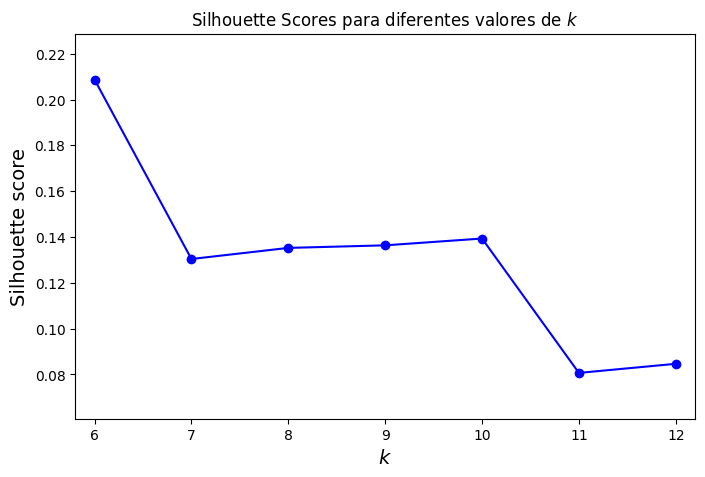

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calcular KMeans y Silhouette Scores solo para k en el rango de 6 a 12
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(dataset_norm)
                for k in range(6, 13)]

silhouette_scores = [silhouette_score(dataset_norm, model.labels_)
                     for model in kmeans_per_k]

# Graficar los Silhouette Scores para el rango de 6 a 12
plt.figure(figsize=(8, 5))
plt.plot(range(6, 13), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([5.8, 12.2, min(silhouette_scores) - 0.02, max(silhouette_scores) + 0.02])  # Ajustamos el tamaño del eje
plt.title("Silhouette Scores para diferentes valores de $k$")
plt.show()

<Figure size 1500x1800 with 0 Axes>

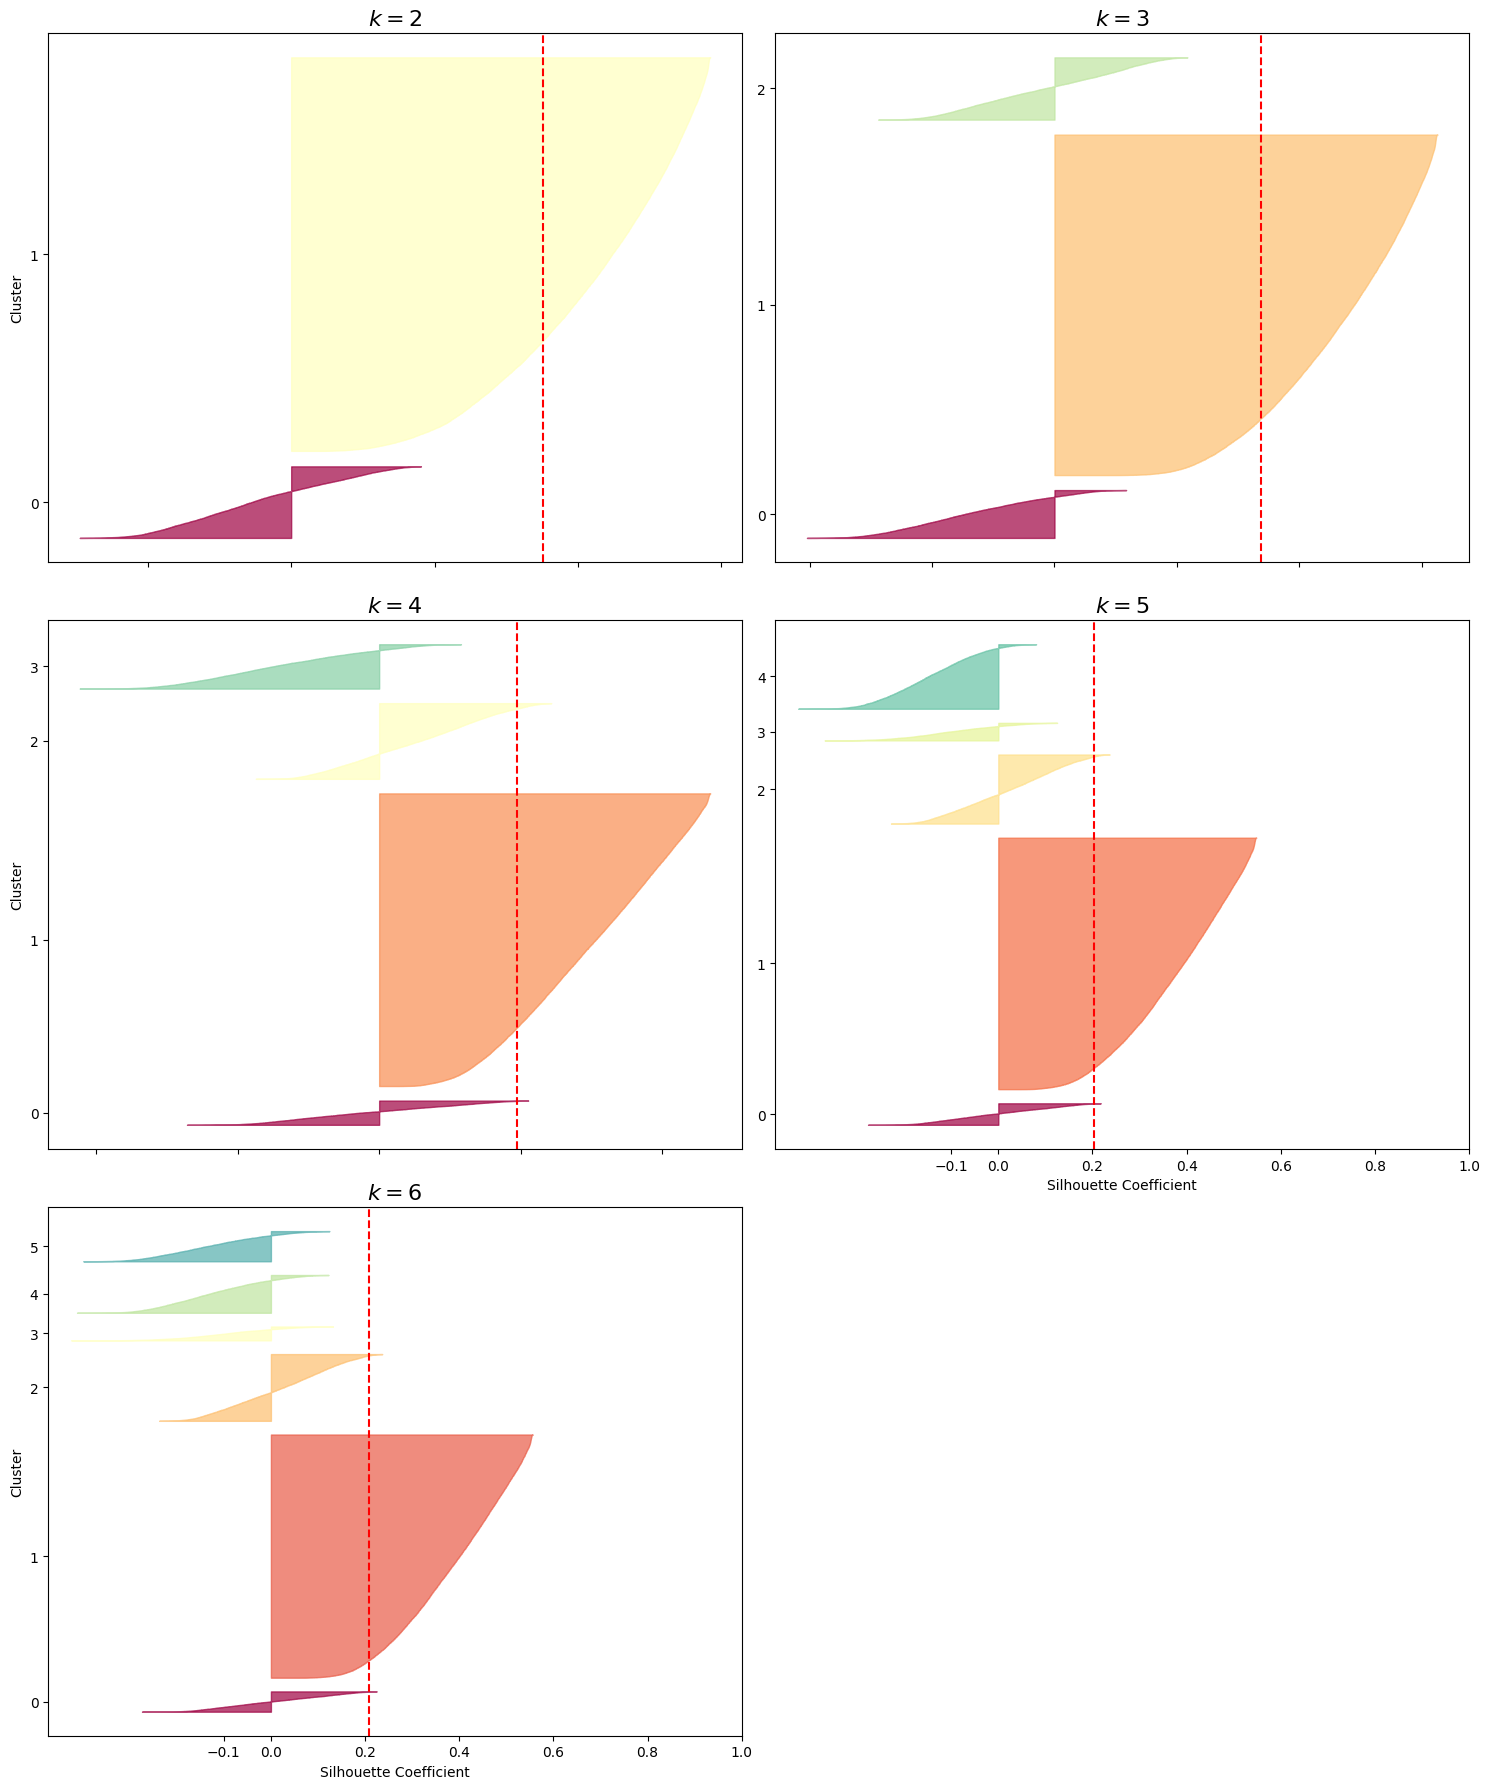

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

plt.figure(figsize=(15, 18))

# Aquí reentrenamos los modelos KMeans para k desde 2 hasta 6
kmeans_per_k = []
silhouette_scores = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_norm)  # Usa tus datos escalados
    
    # Verificar que el número de clústeres es válido
    if len(np.unique(kmeans.labels_)) > 1:
        kmeans_per_k.append(kmeans)
        silhouette_score_value = silhouette_score(dataset_norm, kmeans.labels_)
        silhouette_scores.append(silhouette_score_value)
    else:
        print(f"El modelo con k={k} asignó todas las muestras a un solo clúster.")

# Generar los gráficos solo para los valores de k válidos
plt.figure(figsize=(15, 18))

# Ajustar el rango del bucle para incluir k desde 2 hasta 6
for k in range(2, 7):
    # Solo generar gráficos para k que tienen modelos válidos
    if k - 2 < len(kmeans_per_k):
        plt.subplot(3, 2, k - 1)  # Ajustar el diseño de los subplots

        y_pred = kmeans_per_k[k - 2].labels_  # Ajustar el índice
        silhouette_coefficients = silhouette_samples(dataset_norm, y_pred)

        padding = len(dataset_norm) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (2, 4, 6):
            plt.ylabel("Cluster")

        if k in (5, 6):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()


haciendo predicciones para ver a que grupo pertenece algunos datos insertados:

In [68]:
# Aplicar KMeans para determinar las etiquetas
range_n_clusters = list(range(2, 11))
silhouette_avg_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(dataset_norm)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(dataset_norm, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Para n_clusters = {num_clusters}, el promedio del coeficiente de silueta es: {silhouette_avg}")

Para n_clusters = 2, el promedio del coeficiente de silueta es: 0.3514205259074408
Para n_clusters = 3, el promedio del coeficiente de silueta es: 0.33710392330712813
Para n_clusters = 4, el promedio del coeficiente de silueta es: 0.1949472177224292
Para n_clusters = 5, el promedio del coeficiente de silueta es: 0.20223799087659688
Para n_clusters = 6, el promedio del coeficiente de silueta es: 0.20872460529396036
Para n_clusters = 7, el promedio del coeficiente de silueta es: 0.2065111400770081
Para n_clusters = 8, el promedio del coeficiente de silueta es: 0.059256293768838376
Para n_clusters = 9, el promedio del coeficiente de silueta es: 0.06881525615826287
Para n_clusters = 10, el promedio del coeficiente de silueta es: 0.08130205269547462


In [ ]:
# Entrenar el modelo KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(dataset_norm)
labels = kmeans.labels_

In [ ]:
# Añadir las etiquetas al dataset original
dataset['label'] = labels

In [ ]:
# Guardar el dataset etiquetado
dataset.to_csv('ruta/a/tu/dataset_etiquetado.csv', index=False)  # Reemplaza con la ruta donde deseas guardar el archivo